# Proyecto 5

In [2]:
## Importamos librerías y archivo de funciones

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import functions as f

##  DF PERFIL CLIENTES (df_final_demo)

In [4]:
df = pd.read_csv('df_final_demo.txt') 

#### Exploración

In [5]:
## Exploramos los datos 
f.explorar_df(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB
None
Primeras filas
   client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
0     836976             6.0              73.0      60.5     U        2.0   
1    2304905             7.0              94.0      58.0     U        2.0   
2    1439522             5.0              64.0      32.0     U

In [ ]:
## Comprobamos la cantidad de nulos y cuáles son.
df.isnull().sum()

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [13]:
nulos=f.ver_nulos(df)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
4164,7402828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8316,355337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8677,8412164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9583,4666211,8.0,106.0,NaN,F,2.0,42550.55,4.0,7.0
13444,2222915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18066,4876926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25961,5277910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28432,7616759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35323,8191345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43518,1227228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
## Comprobamos la cantidad de duplicados
duplicados = df.duplicated().sum()
duplicados

np.int64(0)

In [15]:
## A raíz de la exploración, comenzamos la limpieza de nulos.

#### Limpieza 

Eliminaremos las columnas que no aportan información relevante para el análisis, ya que solo tienen valores nulos y el nombre del cliente

In [26]:
#Eliminamos nulos sin información relevante, pero nos quedamos con el client_id 4666211	para imputarle un valor. 
df_limpio = df.dropna(thresh=5)

In [27]:
## Comprobamos que funciona
df_limpio.isnull().sum()

client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            1
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
dtype: int64

In [35]:
## Imputamos valor medio a esa edad 
valor = df_limpio['clnt_age'].mean()
df_limpio= f.completar_nulos(df_limpio,'clnt_age',valor)

/Users/maria/Desktop/ironhack/proyecto-5-/functions.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(valor)


In [36]:
## Comprobamos 
df_limpio.isnull().sum()

client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
dtype: int64

In [40]:
## Hacemos limpieza de datos final (incluye unificación de minus y espacios)
df_final = f.limpiar_dataset(df_limpio)
df_final

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


### Unificación

In [45]:
## Para un uso más cómodo del dataset, unificamos los nombres de las columnas.
df_perfiles = df_final.rename(columns={
    'clnt_tenure_yr': 'años_fidelizacion',
    'clnt_tenure_mnth':'meses_fidelizacion',
    'clnt_age': 'edad',
    'gendr': 'genero',
    'num_accts' : 'cantidad_cuentas',
    'bal' : 'saldo_total_distribuido',
    'calls_6_mnth': 'llamadas_ultimos_6meses',
    'logons_6_mnth': 'log_in_ultimos_6meses'
})

In [46]:
## Comprobamos los cambios 
df_perfiles.head(3)

,client_id,años_fidelizacion,meses_fidelizacion,edad,genero,cantidad_cuentas,saldo_total_distribuido,llamadas_ultimos_6meses,log_in_ultimos_6meses
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0


### Respuestas

¿Quiénes son los principales clientes que utilizan este proceso en línea? ¿Los clientes principales son más jóvenes o mayores, nuevos o antiguos?
A continuación, realice un análisis del comportamiento del cliente para responder cualquier pregunta adicional relevante que considere importante

In [68]:
df_perfiles['client_id'].count()

np.int64(70595)

In [62]:
## 1 - ¿Quiénes son los principales clientes que utilizan este proceso en línea?
perfil_uso = df_perfiles.groupby('genero').agg({
    'log_in_ultimos_6meses': 'median',
    'edad': 'median',
    'client_id': 'count'
}).rename(columns={'client_id': 'total_clientes'})

In [65]:
perfil_uso

,log_in_ultimos_6meses,edad,total_clientes
genero,,,
F,5.0,51.0,22746
M,6.0,49.5,23724
U,5.0,39.0,24122
X,5.0,40.0,3


In [56]:
## 2 - ¿Los clientes principales son más jóvenes o mayores, nuevos o antiguos?


In [47]:
## Veamos como se comporta la variable edad
f.categorico(df_perfiles, 'edad')

edad
58.50000    859
55.50000    830
29.50000    829
28.50000    827
57.50000    826
           ... 
14.00000      2
46.44224      1
94.50000      1
95.50000      1
13.50000      1
Name: count, Length: 166, dtype: int64
[60.5        58.         32.         49.         33.         30.5
 58.5        57.5        67.5        54.5        34.5        51.5
 62.5        36.         74.         32.5        31.         25.5
 42.5        42.         30.         55.         38.         68.5
 52.5        54.         63.         48.         66.5        68.
 65.         51.         46.         63.5        23.         26.5
 56.5        76.5        27.5        39.5        25.         27.
 60.         66.         39.         56.         40.         52.
 31.5        43.5        35.         19.         64.5        64.
 22.5        33.5        36.5        61.         40.5        72.
 44.5        28.5        59.5        45.         18.         78.
 50.5        29.         37.5        57.         70.        

Construimos la tabla de frecuencias por grupos de edades agregando una nueva columna con los rangos de edad

In [53]:
f.rango_edad(df_perfiles, 'edad')

,client_id,años_fidelizacion,meses_fidelizacion,edad,genero,cantidad_cuentas,saldo_total_distribuido,llamadas_ultimos_6meses,log_in_ultimos_6meses,age_group
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Adultos maduros(51-65)
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Adultos maduros(51-65)
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Jóvenes(19-35)
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Adultos(36-50)
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Jóvenes(19-35)
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,Adultos(36-50)
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,Jóvenes(19-35)
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,Adultos maduros(51-65)
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,Adultos mayores(66+)


In [29]:
df_clean1=rango_edad(df_clean,'clnt_age')

In [30]:
df_clean1

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,age_group
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Adultos maduros(51-65)
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Adultos maduros(51-65)
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Jóvenes(19-35)
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Adultos(36-50)
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Jóvenes(19-35)
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,Adultos(36-50)
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,Jóvenes(19-35)
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,Adultos maduros(51-65)
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,Adultos mayores(66+)


### Visualización del dataset

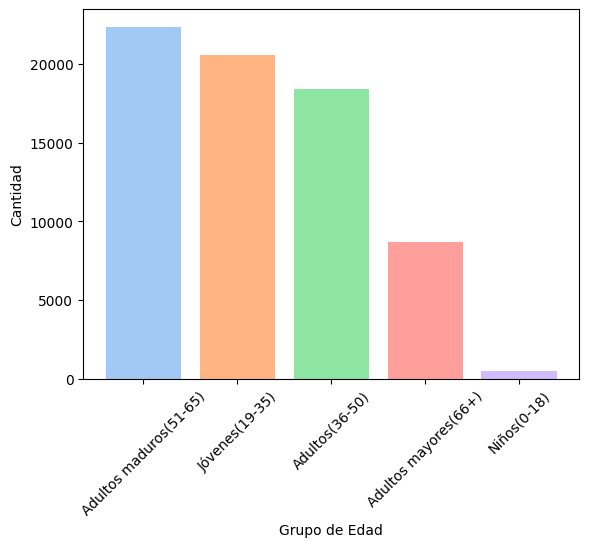

In [50]:
counts = df_clean1['age_group'].value_counts()

plt.bar(counts.index, counts.values, color=sns.color_palette('pastel'))

plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)

plt.show()


array([[<Axes: title={'center': 'client_id'}>,
        <Axes: title={'center': 'clnt_tenure_yr'}>,
        <Axes: title={'center': 'clnt_tenure_mnth'}>],
       [<Axes: title={'center': 'num_accts'}>,
        <Axes: title={'center': 'bal'}>,
        <Axes: title={'center': 'calls_6_mnth'}>],
       [<Axes: title={'center': 'logons_6_mnth'}>, <Axes: >, <Axes: >]],
      dtype=object)

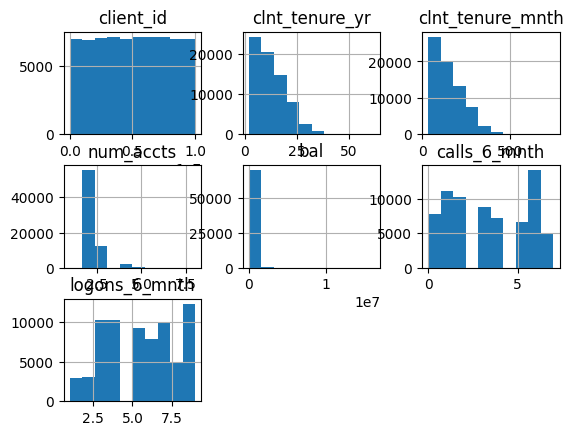

In [ ]:
df_clean.hist()

## Carga datos Huellas digitales

In [ ]:
df_huellas1 = pd.read_csv('df_final_web_data_pt_1.txt') 

Observamos la estructura del dataset

In [ ]:
df_huellas1.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


Analizamos los datos

In [ ]:
F.explorar_df(df_huellas1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343141 entries, 0 to 343140
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     343141 non-null  int64 
 1   visitor_id    343141 non-null  object
 2   visit_id      343141 non-null  object
 3   process_step  343141 non-null  object
 4   date_time     343141 non-null  object
dtypes: int64(1), object(4)
memory usage: 13.1+ MB
None
Primeras filas
   client_id            visitor_id                      visit_id process_step  \
0    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   
1    9988021  580560515_7732621733  781255054_21935453173_531117       step_2   
2    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   
3    9988021  580560515_7732621733  781255054_21935453173_531117       step_2   
4    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   

             date_time  
0  201

No tenemos nulos pero si duplicados. Veamos los duplicados:

In [ ]:
duplicados=F.ver_duplicados(df_huellas1)

,client_id,visitor_id,visit_id,process_step,date_time
365,9358626,148475529_63668223960,223297395_36250329195_832161,start,2017-04-28 12:27:28
368,5376894,622509328_44408201172,688984457_43441834354_912755,start,2017-04-28 14:20:01
383,438567,923318467_50708963627,330543236_29863358529_771432,start,2017-04-28 02:52:29
785,1423857,716830992_81930238382,568819166_80596727019_75889,confirm,2017-04-10 22:44:58
1816,372523,730241475_25771921122,25331354_74479847014_854987,start,2017-04-27 10:51:26
...,...,...,...,...,...
342621,1853345,831456815_77348510380,596026060_87178689141_910423,step_3,2017-04-13 19:39:24
342677,1251269,791822615_78146852845,763845944_55757914723_70888,start,2017-04-28 10:20:33
342679,1251269,791822615_78146852845,763845944_55757914723_70888,start,2017-04-28 10:18:20
342685,8350388,304440669_31040182888,143359398_96671536668_299057,start,2017-04-28 12:44:21


Gestionar y analizar los duplicados

### Cargamos los datos del segundo archivo de huellas

In [ ]:
df_huellas2 = pd.read_csv('df_final_web_data_pt_2.txt')

Observamos el segundo archivo de huellas:

In [ ]:
df_huellas2.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58


Analizamos los datos

In [ ]:
F.explorar_df(df_huellas2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412264 entries, 0 to 412263
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     412264 non-null  int64 
 1   visitor_id    412264 non-null  object
 2   visit_id      412264 non-null  object
 3   process_step  412264 non-null  object
 4   date_time     412264 non-null  object
dtypes: int64(1), object(4)
memory usage: 15.7+ MB
None
Primeras filas
   client_id             visitor_id                      visit_id  \
0     763412  601952081_10457207388  397475557_40440946728_419634   
1    6019349  442094451_91531546617  154620534_35331068705_522317   
2    6019349  442094451_91531546617  154620534_35331068705_522317   
3    6019349  442094451_91531546617  154620534_35331068705_522317   
4    6019349  442094451_91531546617  154620534_35331068705_522317   

  process_step            date_time  
0      confirm  2017-06-06 08:56:00  
1      confirm  2017-06-01 

Igual que antes, no tenemos nulos pero si duplicados. Veamos los duplicados:

In [ ]:
duplicados2=F.ver_duplicados(df_huellas2)


,client_id,visitor_id,visit_id,process_step,date_time
125,3751049,937925261_74821699083,628817270_45049432060_475841,start,2017-05-15 23:09:44
143,9912156,746623513_52101087617,780044921_57678038107_984942,start,2017-05-03 14:09:52
326,5786602,893139880_61416949586,747153834_69434320996_858907,start,2017-05-10 01:49:09
328,5786602,893139880_61416949586,747153834_69434320996_858907,start,2017-05-10 01:48:45
375,5786602,893139880_61416949586,119968876_5423296886_390511,start,2017-06-08 02:14:09
...,...,...,...,...,...
412120,1672289,658797407_91003097342,430110748_90347503221_597628,start,2017-05-01 19:28:53
412163,4408245,14058946_73585431797,994148957_84373994761_991865,start,2017-06-06 09:17:23
412165,4408245,14058946_73585431797,994148957_84373994761_991865,start,2017-06-06 09:09:44
412167,4408245,14058946_73585431797,994148957_84373994761_991865,start,2017-06-06 08:51:16


Gestionar y analizar los duplicados Unir los datos de las huellas

## Cargamos los datos de la lista de experimentos

In [ ]:
df_experimentos = pd.read_csv('df_final_experiment_clients.txt') 

Observamos los datos:

In [ ]:
df_experimentos.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


### Analizamos los datos

In [ ]:
F.explorar_df(df_experimentos)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  70609 non-null  int64 
 1   Variation  50500 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB
None
Primeras filas
   client_id Variation
0    9988021      Test
1    8320017      Test
2    4033851   Control
3    1982004      Test
4    9294070   Control
Describe()
             count unique   top   freq            mean             std    min  \
client_id  70609.0    NaN   NaN    NaN  5004991.876574  2877277.629755  169.0   
Variation    50500      2  Test  26968             NaN             NaN    NaN   

                 25%        50%        75%        max  
client_id  2519329.0  5016978.0  7483085.0  9999839.0  
Variation        NaN        NaN        NaN        NaN  
Nulos
Variation    20109
dtype: int64
Duplicados
0
Tamaño
Filas: 70609 | Columnas: 2


No tiene datos duplicados pero si nulos. Veamos los nulos:

In [ ]:
nulos_exp=F.ver_nulos(df_experimentos)


,client_id,Variation
50500,5459747,NaN
50501,8031000,NaN
50502,1847030,NaN
50503,9713157,NaN
50504,7775828,NaN
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN
